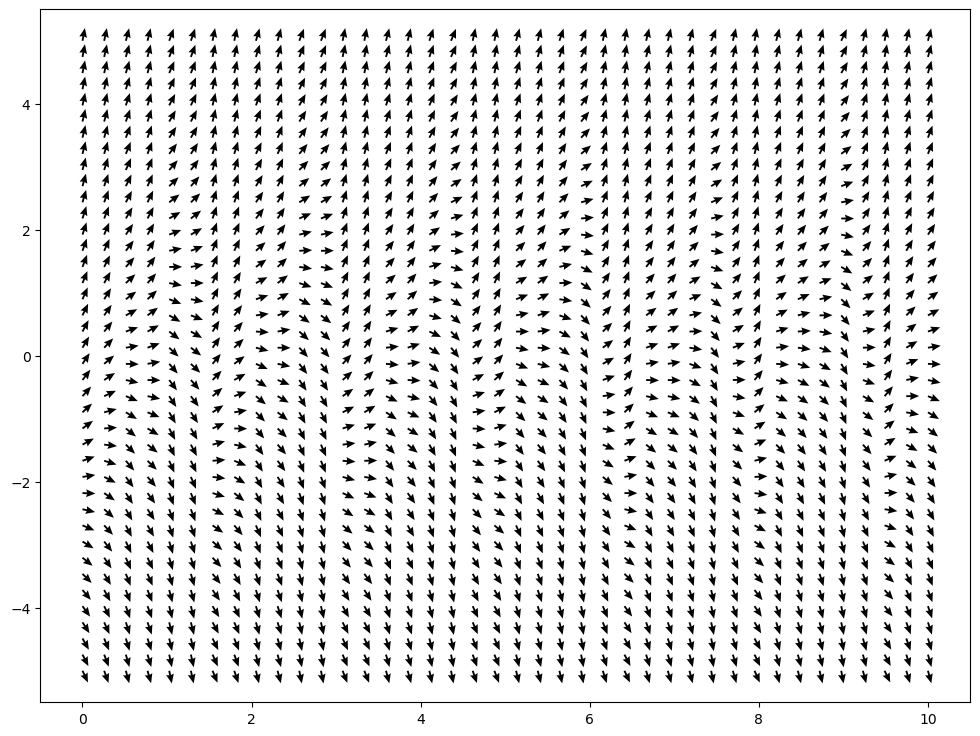

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def plot_df(df, size=(12,9), 
			x_grid=(0.0, 4.0, 20), 
			y_grid=(0.0, 4.0, 20), 
			show_solution=False,
			y_0=0,
            path=None):
	# df: function df(x,y)
	# size: (int, int)
	# x_grid and y_grid for mesh
	
	# figure output size
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(111)
	
	# mesh grid 
    minx, maxx,	xsteps = x_grid
    miny, maxy, ysteps = y_grid
    x,y = np.meshgrid(np.linspace(minx,maxx, xsteps), np.linspace(miny, maxy, ysteps))
	
	# direction values for the vectors
    u = x-x+1
    v = 1*df(x,y)

	# normalize vectors, such that they are same size
    r = np.power(np.add(np.power(u,2), np.power(v,2)),0.5)

    # find solutions to IVP
    plt.quiver(x,y,u/r,v/r, angles="xy", headwidth=4.2, width=0.002)
    if show_solution:
        solution_steps = 101
        t = np.linspace(minx, maxx, solution_steps)
        if type(y_0) == int:
             sol = odeint(df, y_0, t, tfirst=True)
             plt.plot(t, sol)
        else:
             for y_k in y_0:
                  sol = odeint(df, y_0, t, tfirst=True)
                  plt.plot(t, sol)
		
    if path:
         plt.savefig(path, bbox_inches='tight')
    plt.show()

# Define the differential equation y'=df
def df(t,y):
	return 1/20*np.sin(t)+  1/4*np.sin(2*t) + np.sin(4*t) + 1/10*np.sin(8*t) + 1/30*np.cos(t)+  1/10*np.cos(2*t) + np.cos(4*t) + np.cos(8*t) + y
	
plot_df(df, 
        x_grid=(0, 10, 40), 
        y_grid=(-5, 5, 40), 
        show_solution=False, 
        y_0=range(-15, 20, 5), 
        path="example_1")

In [18]:
import numpy as np
from numpy.fft import fft, ifft

def approximate_polynomial(coefficients, threshold):
    # Pad coefficients with zeros
    padded_coefficients = np.pad(coefficients, (0, 2**int(np.ceil(np.log2(len(coefficients)))) - len(coefficients)))
    
    # FFT transformation
    freq_domain = fft(padded_coefficients)
    
    # Remove high-frequency components (thresholding)
    freq_domain[threshold:] = 0
    
    # Inverse FFT transformation
    approximated_coefficients = ifft(freq_domain)
    
    # Extract the real part of the result
    approximated_coefficients = np.real(approximated_coefficients)
    
    return approximated_coefficients[:len(coefficients)]

# Example usage
original_coefficients = [1, 2, 3, 4, 5]
threshold = 3  # Adjust the threshold as needed

approximated_coefficients = approximate_polynomial(original_coefficients, threshold)
print("Original Coefficients:", original_coefficients)
print("Approximated Coefficients:", approximated_coefficients)


Original Coefficients: [1, 2, 3, 4, 5]
Approximated Coefficients: [1.5732233  1.78661165 2.40533009 3.24371843 2.9267767 ]


In [1]:
from math import comb

1-(19/20)**3

0.1426250000000001

In [3]:
x = 0
for i in range(5):
    x += comb(12,i)*0.4**(i) * 0.6**(12-i)
x

0.4381782220799999

[-1.0053297104401588, -0.9943745528336625, -1.0059559079171772, -0.993672415178221, -1.0067486944720117, -0.9927702093748032, -1.0077846578125662, -0.9915683516686009, -1.0091957420082167, -0.9898881711538787, -1.0112301526369976, -0.98737422505782, -1.0144159971233053, -0.9832052174977473, -1.0201071641913084, -0.9749696698836552, -1.0330932376182722, -0.9514116667901403, -1.0894898722360837, -0.08948987223608362, 0.04858833320985967, -0.0330932376182721, 0.025030330116344868, -0.020107164191308535, 0.016794782502252803, -0.014415997123305324, 0.01262577494217998, -0.011230152636997448, 0.010111828846121218, -0.009195742008216823, 0.008431648331399144, -0.007784657812566098, 0.007229790625196797, -0.0067486944720116515, 0.006327584821779031, -0.005955907917177039, 0.0056254471663374495, -0.005329710440158841]


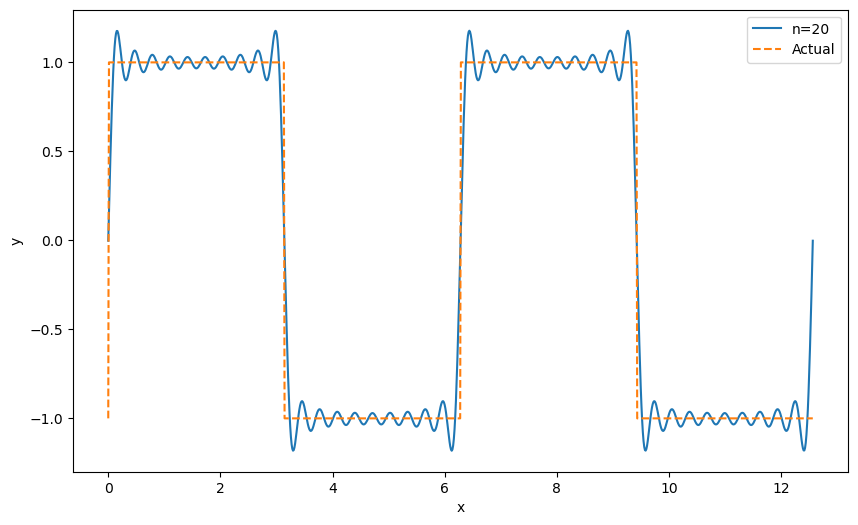

In [123]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import quad
 
# Define the function to approximate 
def square_wave(x): 
    return np.where(np.sin(x) > 0, 1, -1) 
 
# Define the Fourier series coefficients 
def fourier_coeff(n): 
    return 2/(n*np.pi)*(1 - (-1)**n) 
 
# Define the Fourier series approximation 
def fourier_series(x, n_terms): 
    f = square_wave(x) 
    a0 = np.mean(f) 
    series = a0 + sum([fourier_coeff(n)*np.sin(n*x) for n in range(1, n_terms+1)]) 
    return series 
 
# Define the x values 
x = np.linspace(0, 4*np.pi, 1000) 

N = 20

M_N = np.arange(-N+1, N, 1)

def compute_gamma_m(m):
    def func(tau):
        return np.sin(tau)/tau 
    return 0.5 - (1/np.pi) * quad(func,0,m*np.pi)[0]

gamma_m = [compute_gamma_m(m)*np.sign(m) for m in M_N if m!=0]
print(gamma_m)

# Plot the Fourier series approximation 
plt.figure(figsize=(10, 6))
plt.plot(x, fourier_series(x, N), label='n=20') 
plt.plot(x, square_wave(x), '--', label='Actual') 
 
# Add labels and legend 
plt.xlabel('x') 
plt.ylabel('y') 
plt.legend() 
 
# Show the plot 
plt.show() 

In [117]:
1/np.pi

0.3183098861837907